In [1]:
import matplotlib.pyplot as plt
 
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

In [2]:
keras.__version__

'2.4.3'

In [3]:
train_data_path = "brain_tumor_dataset"
validation_data_path = "brain_tumor_dataset"

In [4]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [5]:
training_data =  training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 253 images belonging to 2 classes.


In [6]:
training_data.class_indices
 
valid_datagen = ImageDataGenerator(rescale=1./255)
 
valid_data =  valid_datagen.flow_from_directory(validation_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 253 images belonging to 2 classes.


Found 253 images belonging to 2 classes.


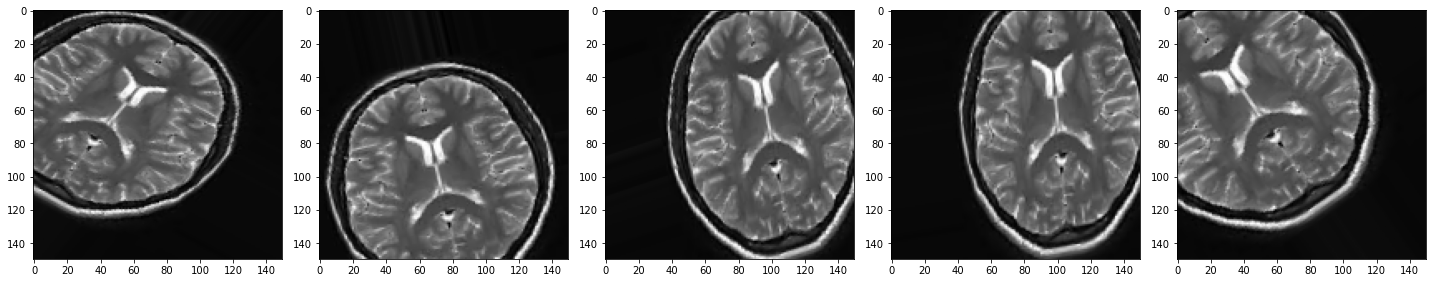

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [7]:
"""#Building cnn model"""
 
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    BatchNormalization(),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [8]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
model_path = 'tumor_or_notumor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
 
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.3525 - accuracy: 0.5217
Epoch 00001: val_accuracy improved from -inf to 0.61660, saving model to tumor_or_notumor.h5
8/8 [==============================] - 14s 2s/step - loss: 1.3525 - accuracy: 0.5217 - val_loss: 0.7273 - val_accuracy: 0.6166
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.1370 - accuracy: 0.6008
Epoch 00002: val_accuracy did not improve from 0.61660
8/8 [==============================] - 13s 2s/step - loss: 1.1370 - accuracy: 0.6008 - val_loss: 0.7072 - val_accuracy: 0.6126
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.9897 - accuracy: 0.6364
Epoch 00003: val_accuracy did not improve from 0.61660
8/8 [==============================] - 13s 2s/step - loss: 0.9897 - accuracy: 0.6364 - val_loss: 0.6984 - val_accuracy: 0.6126
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 1.0075 - accuracy: 0.6126
Epoch 00004: val_accuracy did not improve fr

Epoch 31/100
8/8 [==============================] - ETA: 0s - loss: 1.0186 - accuracy: 0.6443
Epoch 00031: val_accuracy improved from 0.64822 to 0.66008, saving model to tumor_or_notumor.h5
8/8 [==============================] - 13s 2s/step - loss: 1.0186 - accuracy: 0.6443 - val_loss: 0.8399 - val_accuracy: 0.6601
Epoch 32/100
8/8 [==============================] - ETA: 0s - loss: 0.8028 - accuracy: 0.6798
Epoch 00032: val_accuracy did not improve from 0.66008
8/8 [==============================] - 15s 2s/step - loss: 0.8028 - accuracy: 0.6798 - val_loss: 0.8662 - val_accuracy: 0.6482
Epoch 33/100
8/8 [==============================] - ETA: 0s - loss: 0.7258 - accuracy: 0.7194
Epoch 00033: val_accuracy did not improve from 0.66008
8/8 [==============================] - 15s 2s/step - loss: 0.7258 - accuracy: 0.7194 - val_loss: 0.8532 - val_accuracy: 0.6245
Epoch 34/100
8/8 [==============================] - ETA: 0s - loss: 0.8749 - accuracy: 0.6957
Epoch 00034: val_accuracy did not imp

Epoch 59/100
8/8 [==============================] - ETA: 0s - loss: 0.7071 - accuracy: 0.7391
Epoch 00059: val_accuracy did not improve from 0.82609
8/8 [==============================] - 16s 2s/step - loss: 0.7071 - accuracy: 0.7391 - val_loss: 0.4573 - val_accuracy: 0.8103
Epoch 60/100
8/8 [==============================] - ETA: 0s - loss: 0.9361 - accuracy: 0.6522
Epoch 00060: val_accuracy did not improve from 0.82609
8/8 [==============================] - 14s 2s/step - loss: 0.9361 - accuracy: 0.6522 - val_loss: 0.4665 - val_accuracy: 0.7945
Epoch 61/100
8/8 [==============================] - ETA: 0s - loss: 0.7214 - accuracy: 0.7036
Epoch 00061: val_accuracy did not improve from 0.82609
8/8 [==============================] - 14s 2s/step - loss: 0.7214 - accuracy: 0.7036 - val_loss: 0.5399 - val_accuracy: 0.7787
Epoch 62/100
8/8 [==============================] - ETA: 0s - loss: 0.8816 - accuracy: 0.6561
Epoch 00062: val_accuracy did not improve from 0.82609
8/8 [==================

Epoch 89/100
8/8 [==============================] - ETA: 0s - loss: 0.7307 - accuracy: 0.6917
Epoch 00089: val_accuracy did not improve from 0.82609
8/8 [==============================] - 13s 2s/step - loss: 0.7307 - accuracy: 0.6917 - val_loss: 0.4422 - val_accuracy: 0.8103
Epoch 90/100
8/8 [==============================] - ETA: 0s - loss: 0.7545 - accuracy: 0.7391
Epoch 00090: val_accuracy did not improve from 0.82609
8/8 [==============================] - 13s 2s/step - loss: 0.7545 - accuracy: 0.7391 - val_loss: 0.4834 - val_accuracy: 0.7945
Epoch 91/100
8/8 [==============================] - ETA: 0s - loss: 0.8039 - accuracy: 0.6601
Epoch 00091: val_accuracy did not improve from 0.82609
8/8 [==============================] - 13s 2s/step - loss: 0.8039 - accuracy: 0.6601 - val_loss: 0.6139 - val_accuracy: 0.7826
Epoch 92/100
8/8 [==============================] - ETA: 0s - loss: 0.7448 - accuracy: 0.6917
Epoch 00092: val_accuracy did not improve from 0.82609
8/8 [==================

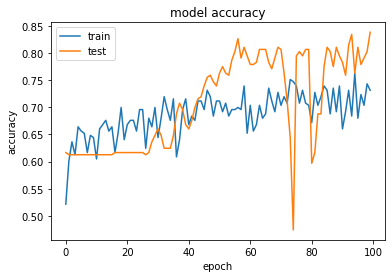

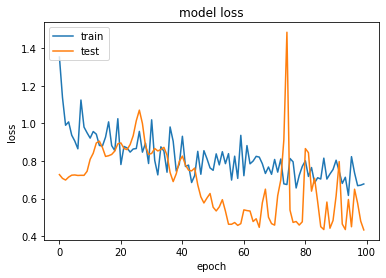

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()